<a href="https://colab.research.google.com/github/Tirth-Modi/Chintu/blob/main/A014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [46]:
df = pd.read_csv("/content/StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [47]:
df.info()
df.isnull().sum()
df.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [48]:
df["average_score"] = (
    df["math score"] + df["reading score"] + df["writing score"]
) / 3

df["pass"] = (df["average_score"] >= 50).astype(int)


In [49]:
categorical_cols = [
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course"
]

encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


In [50]:
X = df.drop(["pass", "average_score"], axis=1)
y = df["pass"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])



Training samples: 800
Testing samples: 200


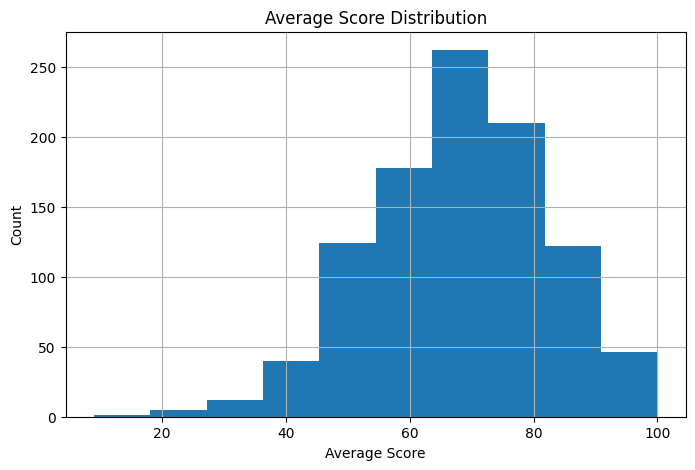

In [51]:
plt.figure(figsize=(8,5))
df["average_score"].hist()
plt.title("Average Score Distribution")
plt.xlabel("Average Score")
plt.ylabel("Count")
plt.show()


In [52]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_preds = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds)

print("Logistic Regression Accuracy:", lr_acc)


Logistic Regression Accuracy: 1.0


In [53]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_preds = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)

print("Decision Tree Accuracy:", dt_acc)


Decision Tree Accuracy: 0.985


In [54]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

print("Random Forest Accuracy:", rf_acc)


Random Forest Accuracy: 0.995


In [55]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [lr_acc, dt_acc, rf_acc]
})

results


,Model,Accuracy
0,Logistic Regression,1.000
1,Decision Tree,0.985
2,Random Forest,0.995
